In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("bouts_out_new.csv")

In [3]:
rename_columns = {
    'age_A': 'edad_a', 'age_B': 'edad_b', 'height_A': 'altura_a', 
    'height_B': 'altura_b', 'reach_A': 'alcance_mano_a',
    'reach_B': 'alcance_mano_b', 'stance_A': 'posicion_a', 'stance_B': 'posicion_b',
    'weight_A': 'peso_a', 'weight_B': 'peso_b', 'won_A': 'ganadas_a', 'won_B': 'ganadas_b',
       'lost_A': 'perdidas_a', 'lost_B': 'perdidas_b', 'drawn_A': 'empatadas_a', 'drawn_B':'empatadas_b',
    'kos_A': 'kos_a', 'kos_B': 'kos_b', 'result': 'resultado', 'decision': 'decision',
    'judge1_A': 'juez1_a', 'judge1_B': 'juez1_b', 'judge2_A': 'juez2_a', 'judge2_B': 'juez2_b', 
    'judge3_A': 'juez3_a', 'judge3_B': 'juez3_b'
}
df.rename(columns=rename_columns, inplace=True)

In [4]:
df.shape

(387427, 26)

## Nulos en edad

Vamos a eliminar todas las columnas que tengan edad nula. Creemos que no es buena opcion colocar edades random.

In [5]:
df = df.drop(df[(df['edad_a'].isnull()) | (df['edad_b'].isnull())].index)

In [6]:
df.shape

(241695, 26)

## Quitamos outliers

In [18]:
df = df.drop(df[(df['edad_a'] <= 18) | (df['edad_b'] <= 18)].index)
df = df.drop(df[(df['altura_a'] <= 100) | (df['altura_b'] <= 100)].index)

## Valores nulos en altura

Creemos que no es inferible a partir del resto de las variables la altura. La edad no nos dice nada al respecto ni tampoco el peso

In [7]:
df = df.drop(df[(df['altura_a'].isnull()) | (df['altura_b'].isnull())].index)

## Alcance de mano

Entendemos que Anatómicamente la distanca de una mano a la otra, es igual a la altura. Para evitar darle datos redundantes a nuestro modelo, vamos a eliminarla.

<img src="img/vitruvian-man-black-silhouette.svg" width="350px">

In [8]:
df = df.drop(["alcance_mano_a", "alcance_mano_b"], axis=1)

## Columnas que consideramos innecesarias

Consideramos que las columnas que hacen referencia a la decision que toma el jurado no van a definir si el boxeador evaluado gana o no 

In [9]:
df = df.drop(["decision", "juez1_a", "juez1_b", "juez2_a", "juez2_b", "juez3_a", "juez3_b"], axis=1)

## Definimos la variable a predecir

In [10]:
df["gano"] = df.resultado == 'win_A'

In [11]:
df.gano.value_counts()

True     79411
False    19392
Name: gano, dtype: int64

## Peso?

Mirando los datos notamos que los combates se realizan solamente con personas del mismo pesaje. Por tanto, podemos decir que no va a ser necesario el peso.

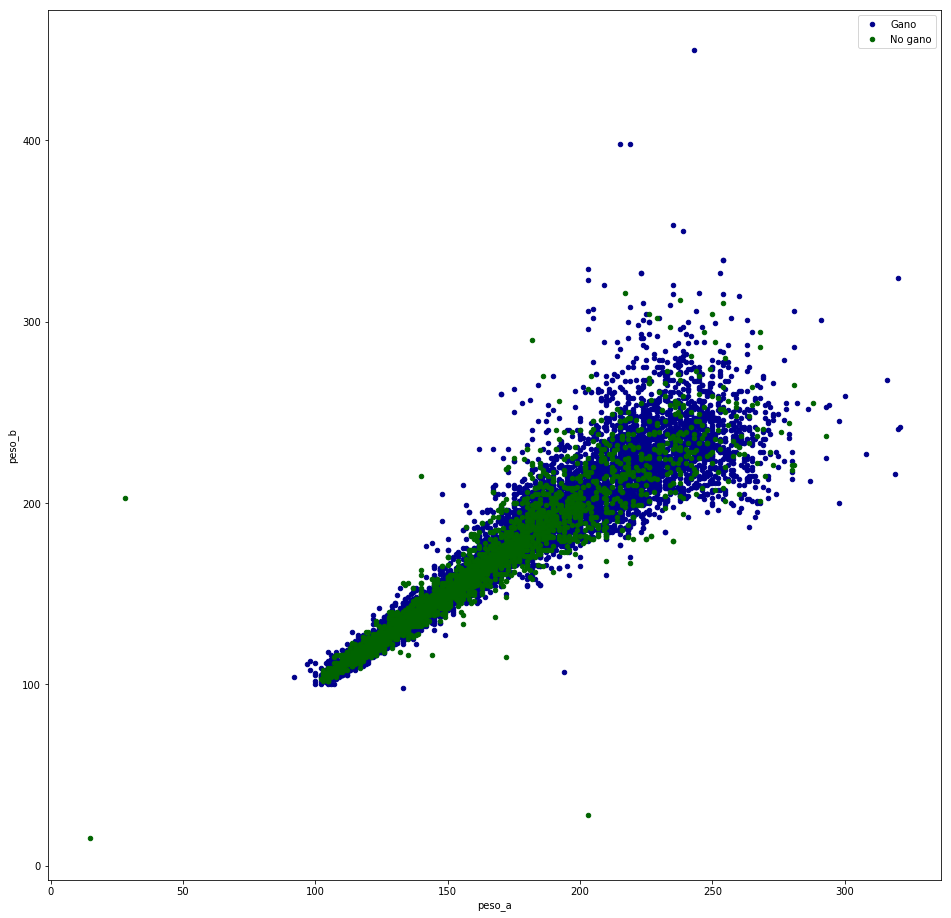

In [12]:
ax = df[df.gano==1].plot.scatter(x='peso_a', y='peso_b', color='DarkBlue', label='Gano',figsize=(16,16));
df[df.gano==0].plot.scatter(x='peso_a', y='peso_b', color='DarkGreen', label='No gano', ax=ax,  figsize=(16,16));

In [13]:
df = df.drop(["peso_a", "peso_b"], axis=1)

In [14]:
df.shape

(98803, 16)

## Ganados?

In [15]:
df["diff_ganadas_a_b"] = df.ganadas_a - df.ganadas_b

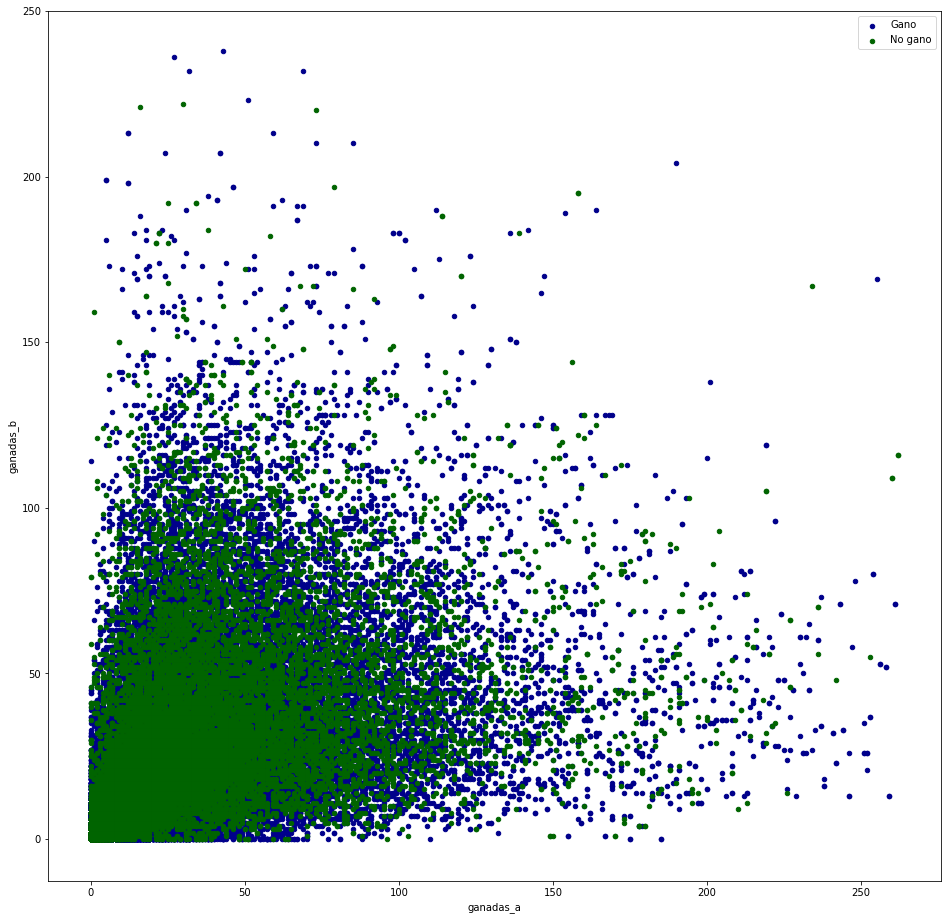

In [16]:
ax = df[df.gano==1].plot.scatter(x='ganadas_a', y='ganadas_b', color='DarkBlue', label='Gano', figsize=(16,16));
df[df.gano==0].plot.scatter(x='ganadas_a', y='ganadas_b', color='DarkGreen', label='No gano', ax=ax, figsize=(16,16));

In [ ]:
df["diff_ganadas_a_b"] = df.ganadas_a - df.ganadas_b

In [ ]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# de victorias cuando A>B')
df[df.diff_ganadas_a_b>0].gano.value_counts().plot.bar(ax=ax[0])
ax[1].set_title('# de victorias cuando A<B')
df[df.diff_ganadas_a_b<0].gano.value_counts().plot.bar(ax=ax[1])
ax[2].set_title('% de victorias cuando A>B')
(df[df.diff_ganadas_a_b > 0].gano.value_counts().sort_index() / df.gano.value_counts().sort_index()).plot.bar(ax=ax[2])